# DJIA: Is the rise in the index recent?

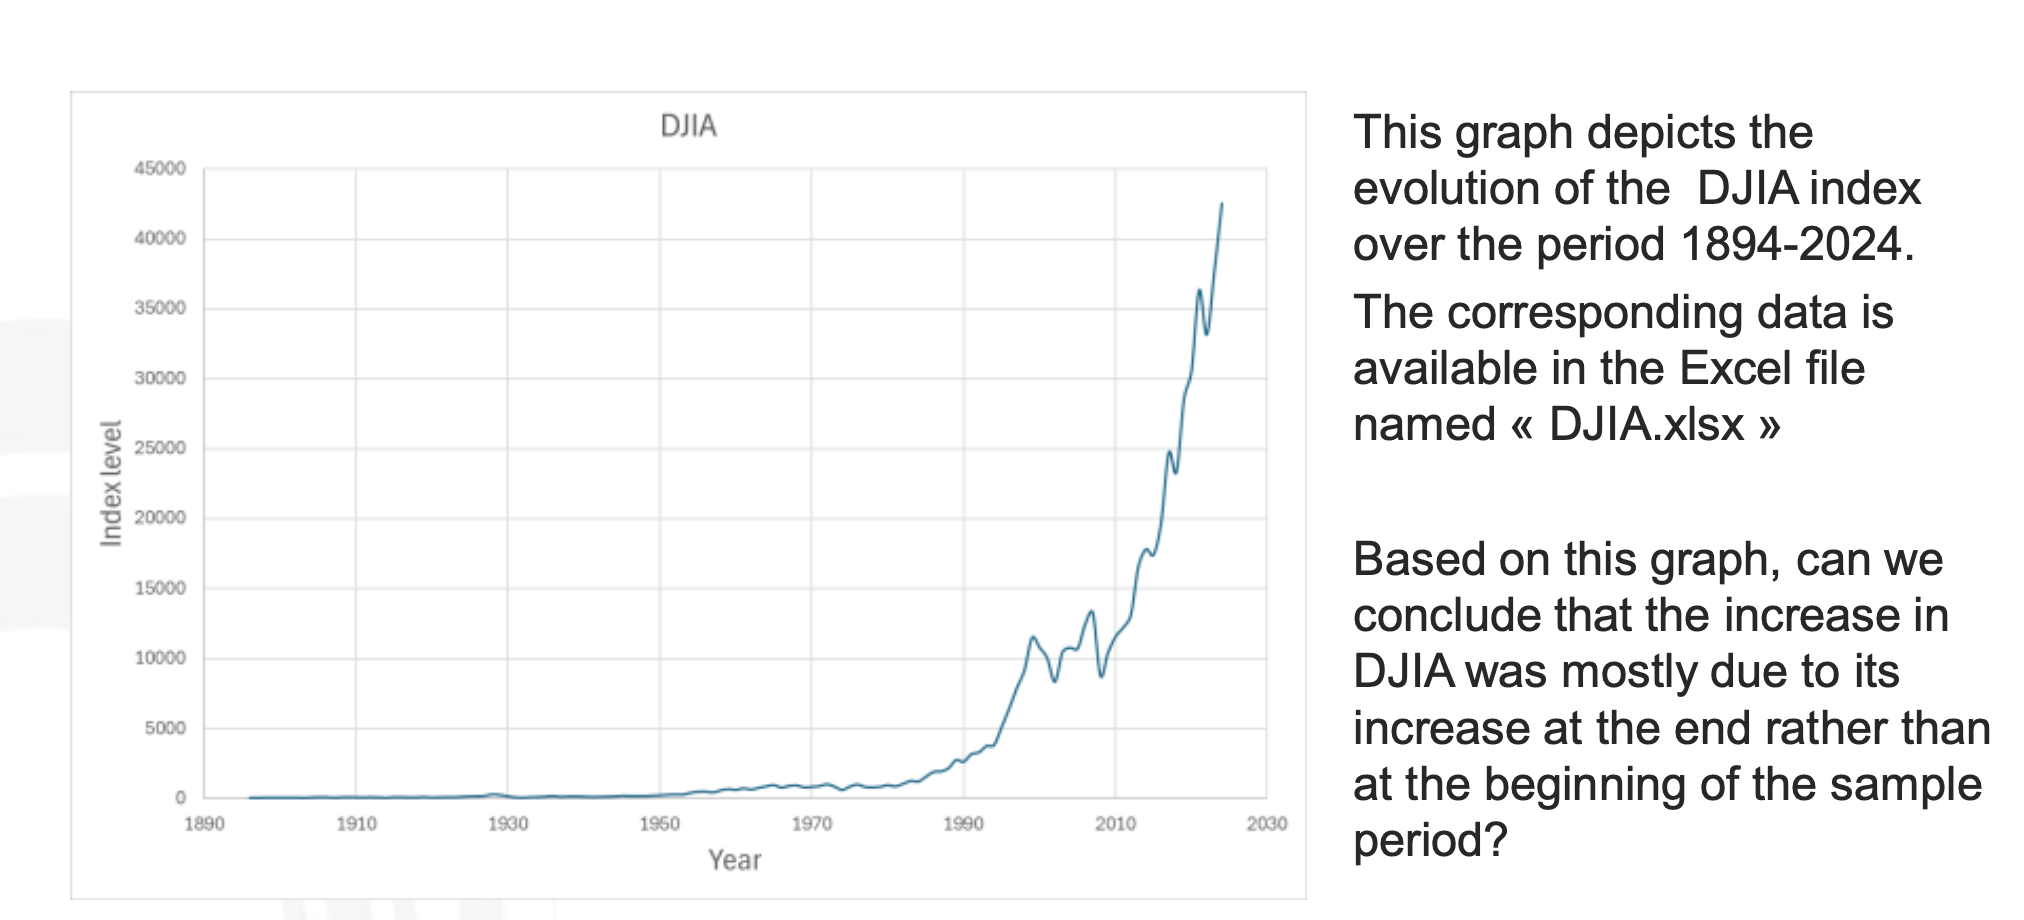

In [1]:
import pandas as pd

df = pd.read_excel("/Users/hirecheariles/Documents/Cours/Master Finance/IFM/Exo Chap 2/DJIA.xlsx", index_col="Year")
df

,Value,ln(Value)
Year,,
1896,40.45,3.700067
1897,49.41,3.900153
1898,60.52,4.102974
1899,66.08,4.190866
1900,70.71,4.258587
...,...,...
2020,30606.48,10.328967
2021,36338.30,10.500628
2022,33147.25,10.408715


Let's compute the growth rate of the index for each period.

In [2]:
# Creating a column with the value from the previous year
df["lag"]=df["Value"].shift()
# Computing the growth rate
df["growth (%)"]=((df["Value"]/df["lag"])-1)*100
df

,Value,ln(Value),lag,growth (%)
Year,,,,
1896,40.45,3.700067,NaN,NaN
1897,49.41,3.900153,40.45,22.150803
1898,60.52,4.102974,49.41,22.485327
1899,66.08,4.190866,60.52,9.187046
1900,70.71,4.258587,66.08,7.006659
...,...,...,...,...
2020,30606.48,10.328967,28538.44,7.246507
2021,36338.30,10.500628,30606.48,18.727472
2022,33147.25,10.408715,36338.30,-8.781506


Let's compute the mean of the first 15 years and last 15 years

In [3]:
firsts = df[:16]["growth (%)"].mean()
lasts = df[:-15]["growth (%)"].mean()
print("First 15 mean return =", firsts.round(4), ", and last 15 mean return =", lasts.round(4))

First 15 mean return = 7.5023 , and last 15 mean return = 7.3567


We can see that there's no clear increase of the growth rate between the beginning and the end of the period.

The graph above uses an absolute value scale, such that for each year, the value of the index is computed using the one from the previous period. 

Hence, the latter we get, the higher is the gap between the value at the beginning and at the end of the year, for a similar growth rate.

The logarithm cancels out this effect. Let's plot the data after applying it.

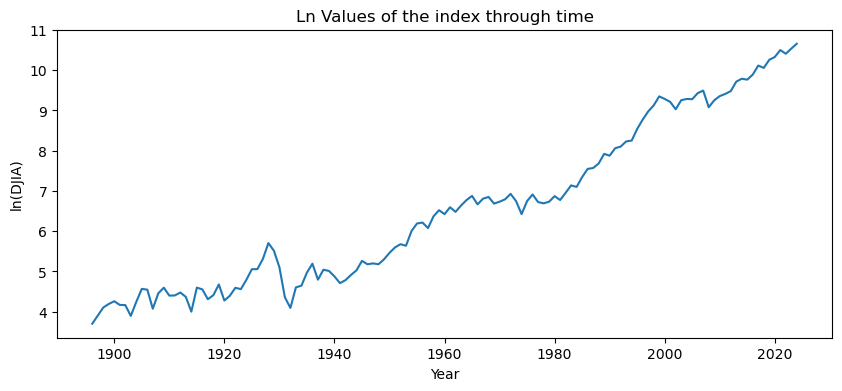

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df["ln(Value)"])
plt.title("Ln Values of the index through time")
plt.xlabel("Year")
plt.ylabel("ln(DJIA)");

And now we'll perform a regression on the years.

In [8]:
import statsmodels.api as sm

X=sm.add_constant(df.index)
y=df["ln(Value)"]
mdl=sm.OLS(y, X).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(Value)   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1890.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           3.98e-78
Time:                        09:48:18   Log-Likelihood:                -94.339
No. Observations:                 129   AIC:                             192.7
Df Residuals:                     127   BIC:                             198.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -95.5430      2.349    -40.681      0.000    -100.190     -90.895
x1             0.0521      0.001     43.479      0.000       0.050       0.054
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.377
Skew:                          -0.074   Prob(JB):                       0.0250
Kurtosis:                       1.838   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print("The mean return/growth rate during the period is", mdl.params.iloc[1].round(4))

The mean return/growth rate during the period is 0.0521


Let's plot the fitted line on the graph above.

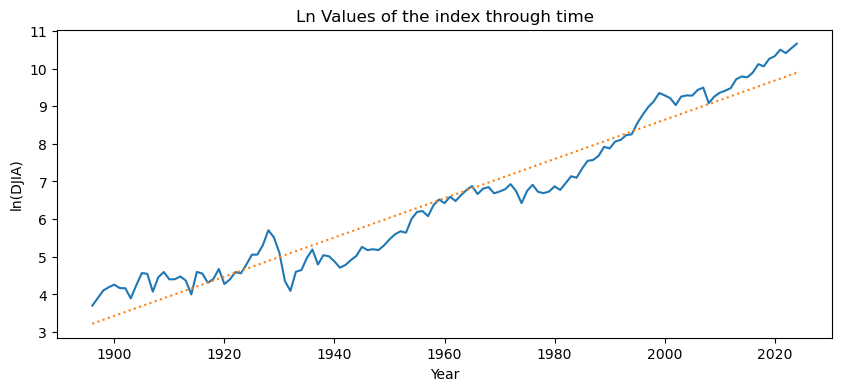

In [38]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["ln(Value)"])
plt.title("Ln Values of the index through time")
plt.xlabel("Year")
plt.ylabel("ln(DJIA)")

plt.plot(mdl.fittedvalues, linestyle=":");

Doing the same regression with sklearn.LinearRegression()

In [53]:
from sklearn.linear_model import LinearRegression

mdlbis=LinearRegression()
mdlbis.fit(X, y)
Beta0 = mdlbis.intercept_
Beta1 = mdlbis.coef_[1]
Beta0
mdlbis.predict(X);

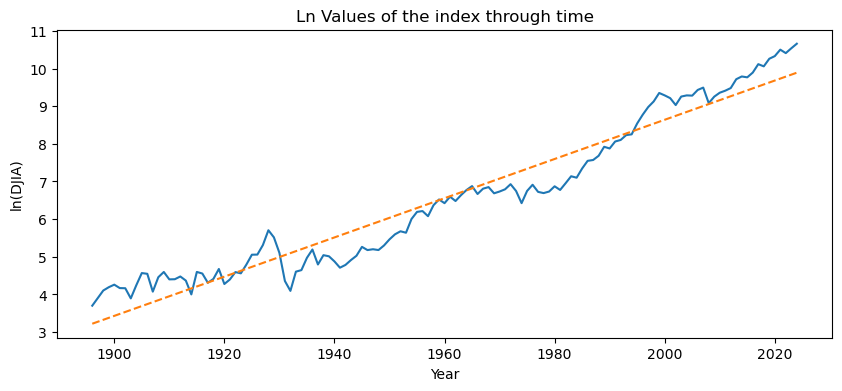

In [52]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["ln(Value)"])
plt.title("Ln Values of the index through time")
plt.xlabel("Year")
plt.ylabel("ln(DJIA)")

plt.plot(df.index, mdlbis.predict(X), linestyle='--');